#### 3회차 Assignment
winequality-white 데이터에서 residual sugar를 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

분류 문제를 해결할 때 winequality-red.csv 파일이 쉼표가 아닌 세미콜론으로 클래스들이 구분되어 있으므로 명령어를 통해 세미콜론을 쉽표로 바꿔준 파일 whitewine.csv를 활용하자.

In [2]:
df =pd.read_csv('C:/Users/yoojm/AIStudy/practice/Dataset/whitewine.csv', index_col=0)
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...
6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6


In [3]:
y = df['residual sugar']
y

fixed acidity
7.0    20.7
6.3     1.6
8.1     6.9
7.2     8.5
7.2     8.5
       ... 
6.2     1.6
6.6     8.0
6.5     1.2
5.5     1.1
6.0     0.8
Name: residual sugar, Length: 4898, dtype: float64

In [4]:
x = df.drop('residual sugar', axis=1)
x

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,
7.0,0.27,0.36,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
6.3,0.30,0.34,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
8.1,0.28,0.40,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7.2,0.23,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
7.2,0.23,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...
6.2,0.21,0.29,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6.6,0.32,0.36,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6.5,0.24,0.19,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6


In [5]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3673, 10), (1225, 10), (3673,), (1225,))

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [7]:
# SVR
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print(clf_svm.score(x_train, y_train))

0.15351612325879038


In [8]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 5.009598519135949


In [9]:
# LR
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print(clf_lr.score(x_train, y_train))

0.870918776997453


In [10]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.25802186308283


In [11]:
# DT

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print(clf_dt.score(x_train, y_train))

0.999997681964087


In [12]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.247071563667899


In [13]:
# RF
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)

pred_rf = rf_clf.predict(x_test)

print(rf_clf.score(x_train, y_train))

0.9895256063558209


In [14]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 1.8468781348116483


0.2197164006919491


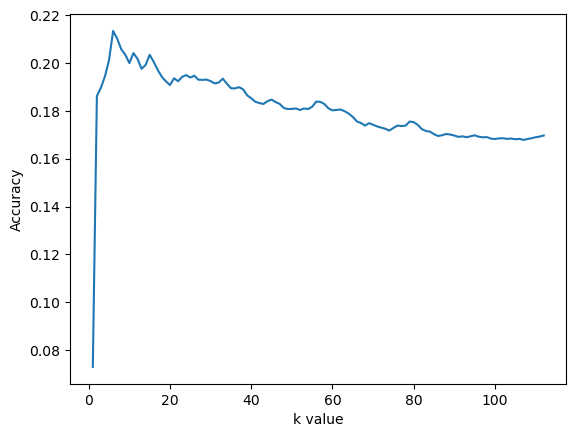

In [15]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  KNR = KNeighborsRegressor(n_neighbors = k)
  KNR.fit(x_train, y_train.values.ravel())

  find_accuracy.append(KNR.score(x_test, y_test))
  
pred_KNR = KNR.predict(x_test)
print(KNR.score(x_train, y_train))

plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [16]:
mse = np.sqrt(mean_squared_error(pred_KNR, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 4.819225063922531
